In [1]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

In [2]:
infection = np.load('infection.npy')
diagonise = np.load('diagnosis.npy')

In [3]:
newX = []
newY = []
for i in range(8000):
    for j in range(500):
        tmp = list(diagonise[i,j:j+10])
        tmp.append(j+10)
        newX.append(tmp)
        newY.append(infection[i,j+11])

In [4]:
trainX = newX[0:1000000]
trainY = newY[0:1000000]
testX = newX[1000000:]
testY = newY[1000000:]

In [5]:
testY = list(testY)
testX = list(testX)
trainY = list(trainY)
trainX = list(trainX)

In [6]:
flag500 = 0
trainX_clean = []
trainY_clean = []
for i in range(len(trainY)):
    if trainY[i] != 500:
        trainX_clean.append(trainX[i])
        trainY_clean.append(trainY[i])
        flag500 = 0
    else:
        if flag500 == 0:
            trainX_clean.append(trainX[i])
            trainY_clean.append(trainY[i])
            flag500=1
            
trainX_clean1 = []
trainY_clean1 = []
for i in range(11,len(trainY_clean)):
    if trainY_clean[i] != trainY_clean[i-12]:
        trainX_clean1.append(trainX_clean[i])
        trainY_clean1.append(trainY_clean[i])

In [7]:
clf = RandomForestClassifier()
clf.fit(X=trainX_clean1, y=trainY_clean1)

/Users/keli/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

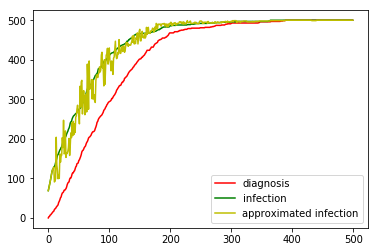

In [115]:
t = 6605
plt.plot(diagonise[t][0:500],label = 'diagnosis',color = 'r')
plt.plot(infection[t][0:500],label = 'infection',color = 'g')
predict = list(infection[t][0:10])
error = 0
for i in range(3029):
    tmp = list(diagonise[t][i:i+10])
    tmp.append(i+10)
    pre = clf.predict([tmp])
    error += (np.abs(pre-infection[t][i+11])/infection[t][i+11])
    predict.append(pre)
plt.plot(predict[0:500],label = 'approximated infection',color = 'y')
plt.legend()

In [9]:
newX = []
newY = []
for i in range(8000):
    for j in range(500):
        tmp = list(infection[i,j:j+35])
        tmp.append(j+10)
        newX.append(tmp)
        newY.append(infection[i,j+36])

In [13]:
trainX = newX[0:1000000]
trainY = newY[0:1000000]
testX = newX[1000000:]
testY = newY[1000000:]
testY = list(testY)
testX = list(testX)
trainY = list(trainY)
trainX = list(trainX)
flag500 = 0
trainX_clean = []
trainY_clean = []
for i in range(len(trainY)):
    if trainY[i] != 500:
        trainX_clean.append(trainX[i])
        trainY_clean.append(trainY[i])
        flag500 = 0
    else:
        if flag500 == 0:
            trainX_clean.append(trainX[i])
            trainY_clean.append(trainY[i])
            flag500=1
flag499 = 0
trainX_clean1 = []
trainY_clean1 = []
for i in range(11,len(trainY_clean)):
    if trainY_clean[i] != trainY_clean[i-36]:
        trainX_clean1.append(trainX_clean[i])
        trainY_clean1.append(trainY_clean[i])

In [14]:
clf1 = RandomForestClassifier()
clf1.fit(X=trainX_clean1, y=trainY_clean1)

/Users/keli/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

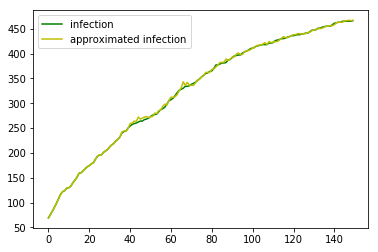

In [114]:
#plt.plot(diagonise[6401][0:150],label = 'diagnosis',color = 'r')
t = 6605
plt.plot(infection[t][0:150],label = 'infection',color = 'g')
predict = list(infection[t][0:35])
for i in range(3003):
    tmp = list(infection[t][i:i+35])
    tmp.append(i+35)
    pre = clf1.predict([tmp])
    predict.append(pre)
plt.plot(predict[0:150],label = 'approximated infection',color = 'y')
plt.legend()
plt.show()

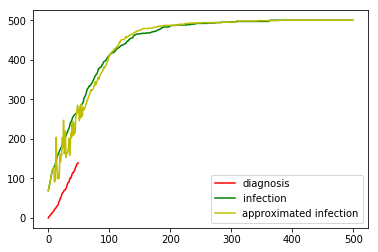

In [113]:
t = 6605
plt.plot(diagonise[t][0:50],label = 'diagnosis',color = 'r')
plt.plot(infection[t][0:500],label = 'infection',color = 'g')
predict = list(infection[t][0:10])
for i in range(40):
    tmp = list(diagonise[t][i:i+10])
    tmp.append(i+10)
    pre = clf.predict([tmp])
    predict.append(pre)
for i in range(40,500):
    tmp = predict[-35:]
    tmp.append(i+10)
    pre = clf1.predict([tmp])
    predict.append(pre)
plt.plot(predict[0:500],label = 'approximated infection',color = 'y')
plt.legend()
plt.show()

In [101]:
#calculate error
error = 0
num = []
for t in range(6400,6800):
    predict = list(infection[t][0:10])
    for i in range(40):
        tmp = list(diagonise[t][i:i+10])
        tmp.append(i+10)
        pre = clf.predict([tmp])
        error += (np.abs(pre-infection[t][i+11])/infection[t][i+11])
        predict.append(pre)
    for i in range(40,3000):
        tmp = predict[-35:]
        tmp.append(i+10)
        #print(tmp)
        pre = clf1.predict([tmp])
        error += (np.abs(pre-infection[t][i+11])/infection[t][i+11])
        if infection[t][i+11]==500:
            num.append(i)
            #print(num)
            break
        predict.append(pre)
    print(t)
print(error/sum(num))

6400
6401
6402
6403
6404
6405
6406
6407
6408
6409
6410
6411
6412
6413
6414
6415
6416
6417
6418
6419
6420
6421
6422
6423
6424
6425
6426
6427
6428
6429
6430
6431
6432
6433
6434
6435
6436
6437
6438
6439
6440
6441
6442
6443
6444
6445
6446
6447
6448
6449
6450
6451
6452
6453
6454
6455
6456
6457
6458
6459
6460
6461
6462
6463
6464
6465
6466
6467
6468
6469
6470
6471
6472
6473
6474
6475
6476
6477
6478
6479
6480
6481
6482
6483
6484
6485
6486
6487
6488
6489
6490
6491
6492
6493
6494
6495
6496
6497
6498
6499
6500
6501
6502
6503
6504
6505
6506
6507
6508
6509
6510
6511
6512
6513
6514
6515
6516
6517
6518
6519
6520
6521
6522
6523
6524
6525
6526
6527
6528
6529
6530
6531
6532
6533
6534
6535
6536
6537
6538
6539
6540
6541
6542
6543
6544
6545
6546
6547
6548
6549
6550
6551
6552
6553
6554
6555
6556
6557
6558
6559
6560
6561
6562
6563
6564
6565
6566
6567
6568
6569
6570
6571
6572
6573
6574
6575
6576
6577
6578
6579
6580
6581
6582
6583
6584
6585
6586
6587
6588
6589
6590
6591
6592
6593
6594
6595
6596
6597
6598
6599
